In [ ]:
from google.colab import drive
drive.mount("gdrive")

Mounted at gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pickle
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import SGDClassifier
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from imblearn.over_sampling import SMOTE
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
import numpy as np
from keras.models import load_model
import xgboost as xgb
from sklearn.metrics.pairwise import pairwise_distances


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/churn_project/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


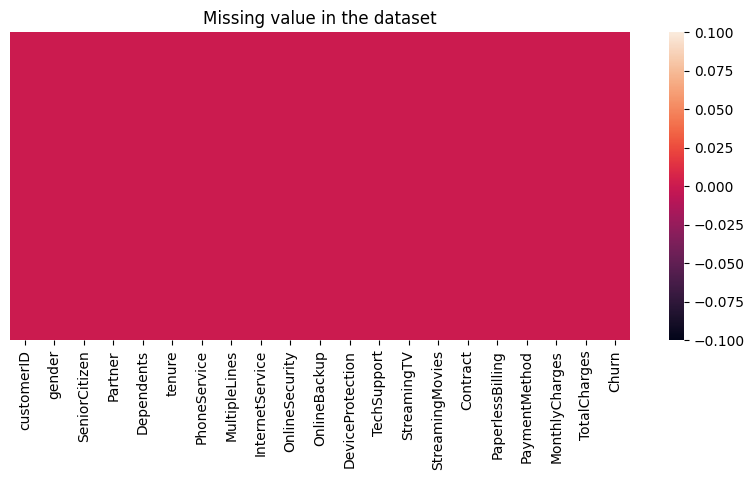

In [ ]:
# msno matrix
plt.figure(figsize=(10,4))
sns.heatmap(data=df.isnull(), yticklabels=False)
plt.title('Missing value in the dataset');

In [ ]:
# Apply label encoder for word data in dataframe
df = df.apply(LabelEncoder().fit_transform)

<Axes: >

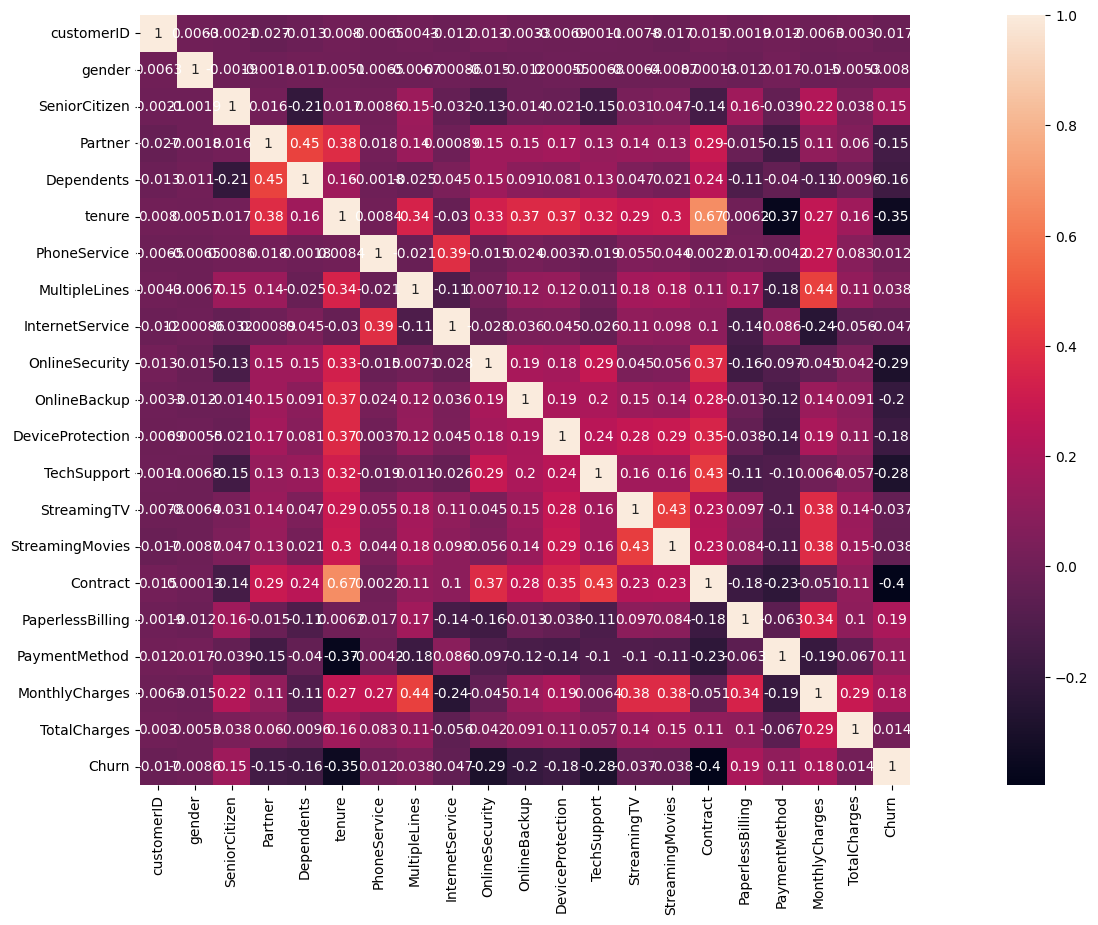

In [ ]:
# Heat Map
corrmat = df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corrmat, square=True,annot = True)

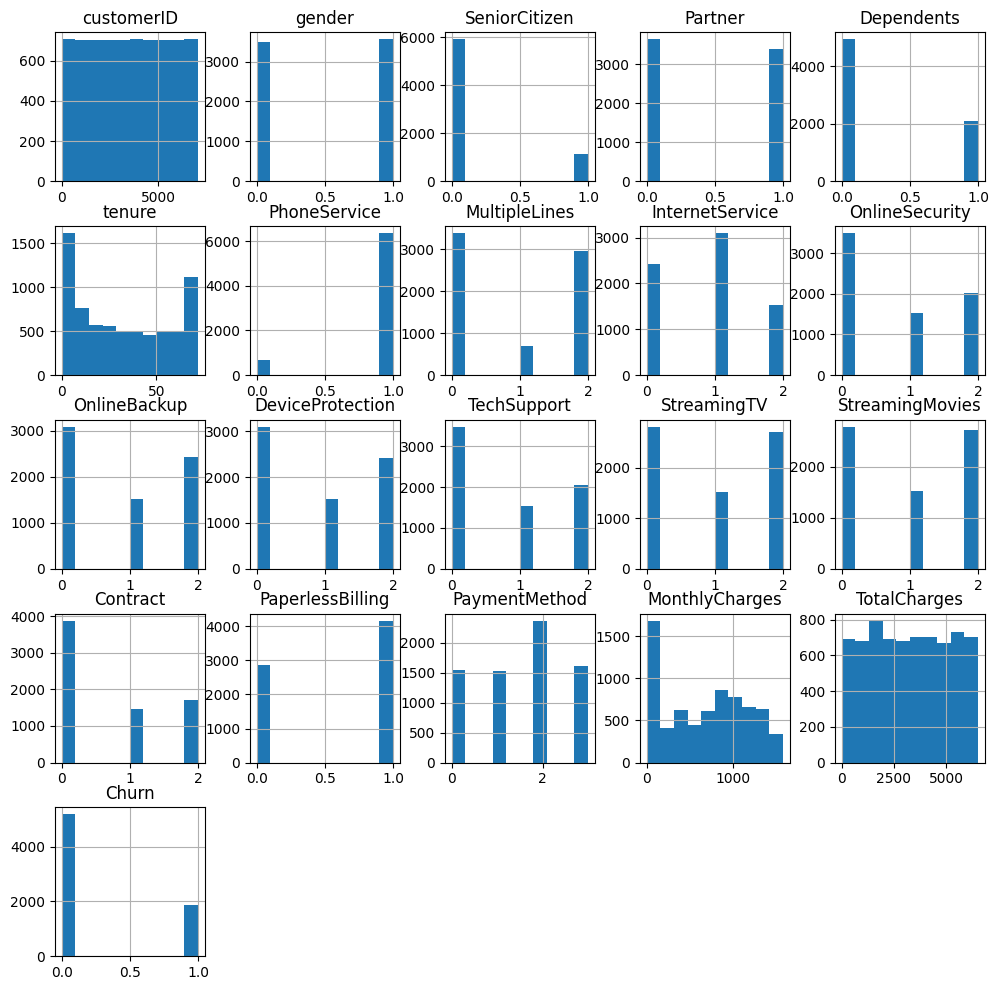

In [ ]:
# Histogram plot which is used to show the frequency distributions.
df.hist(figsize=(12,12))
plt.show()

<ipython-input-10-bd6d04d9ee9a>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots(figsize=(18,1.5))


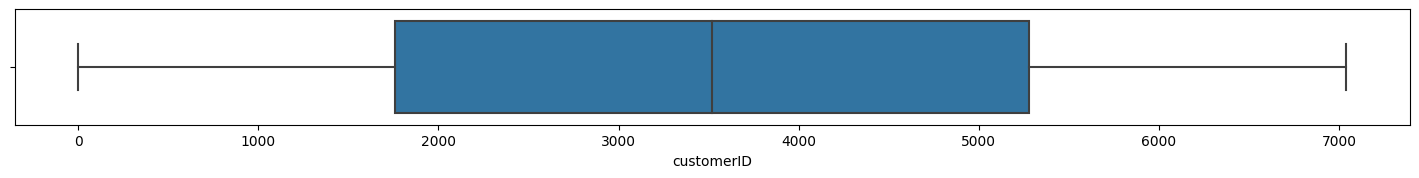

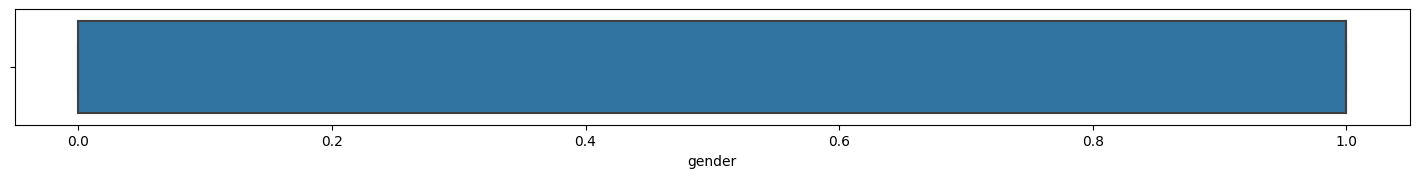

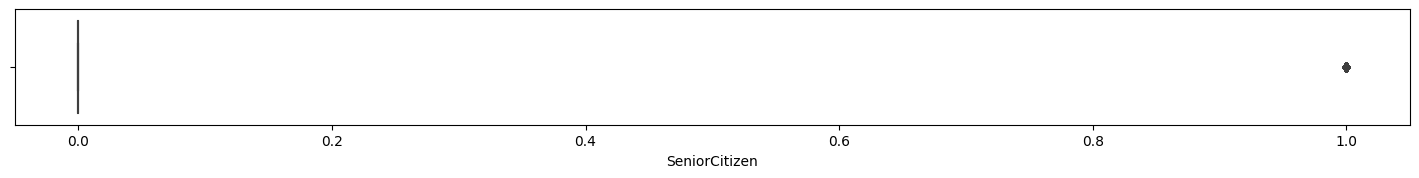

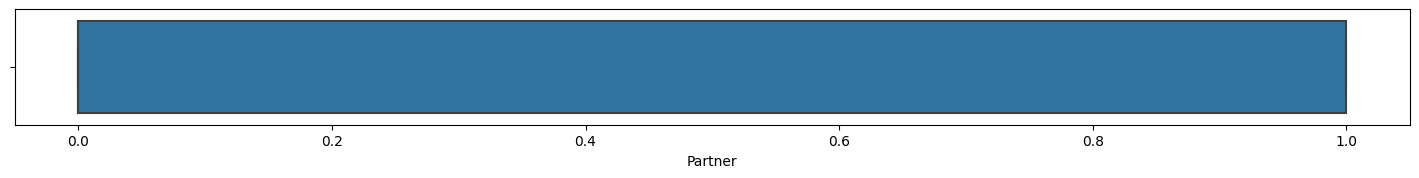

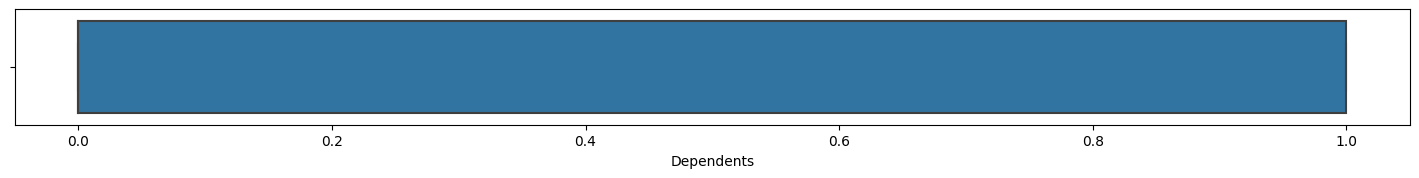

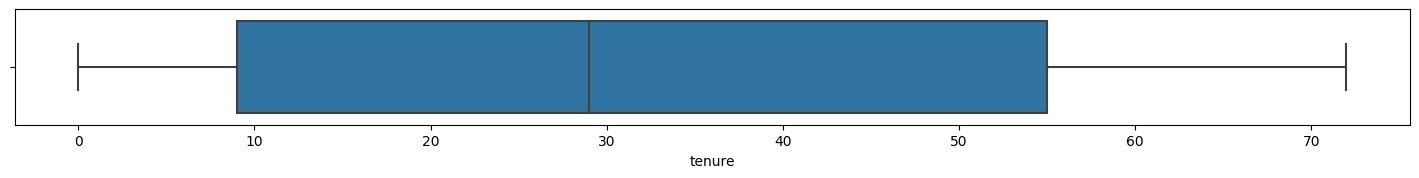

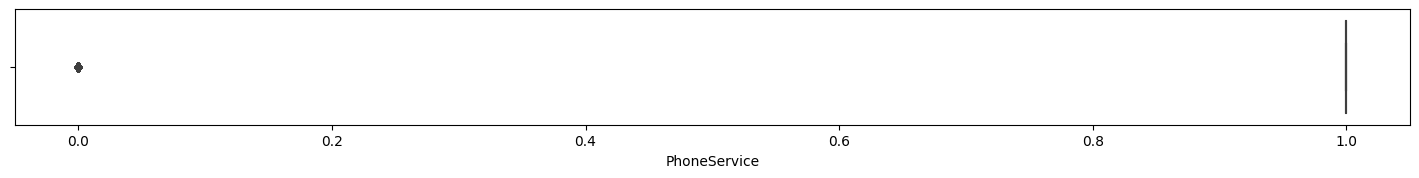

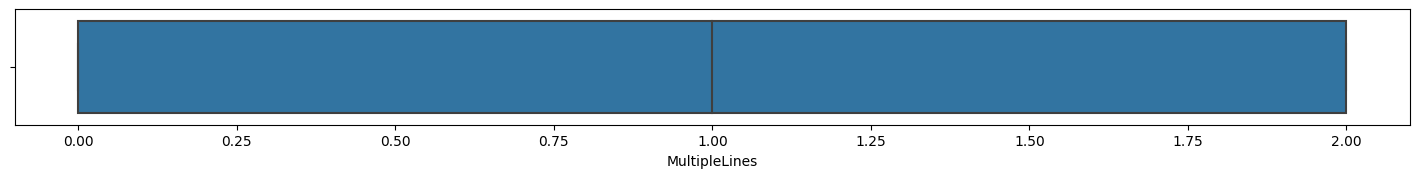

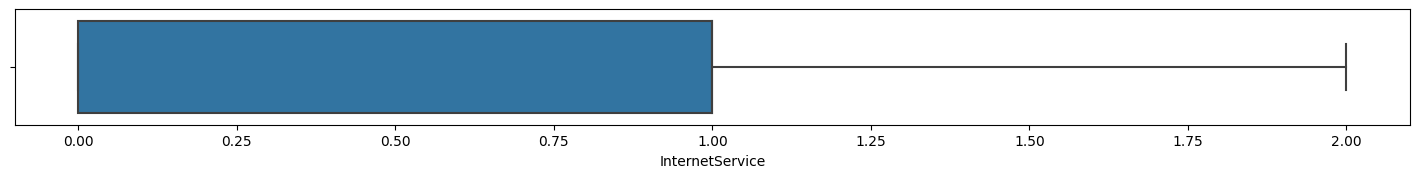

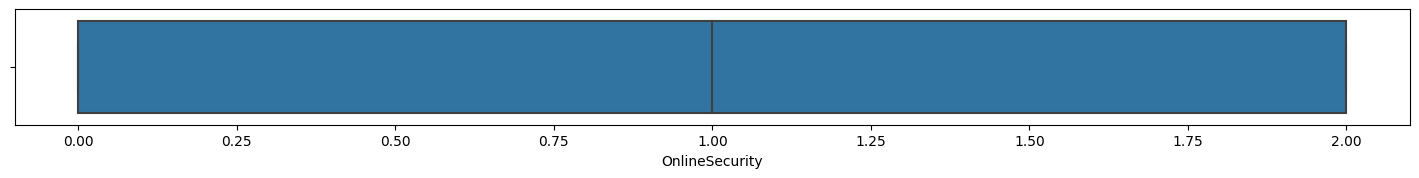

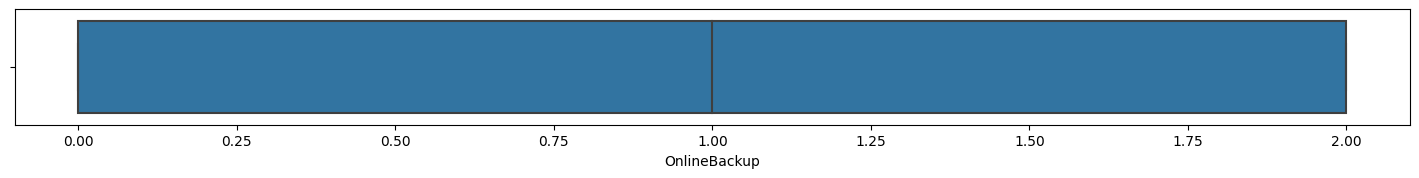

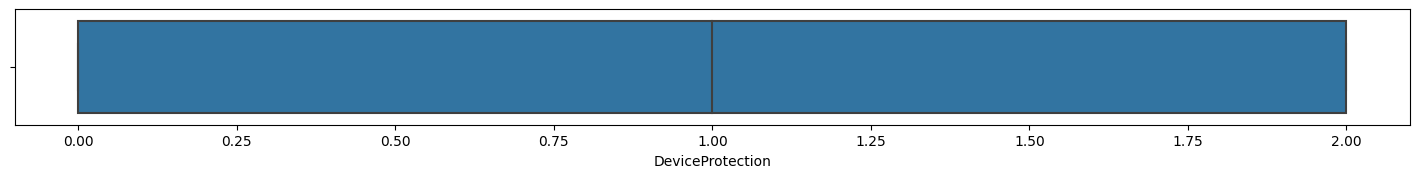

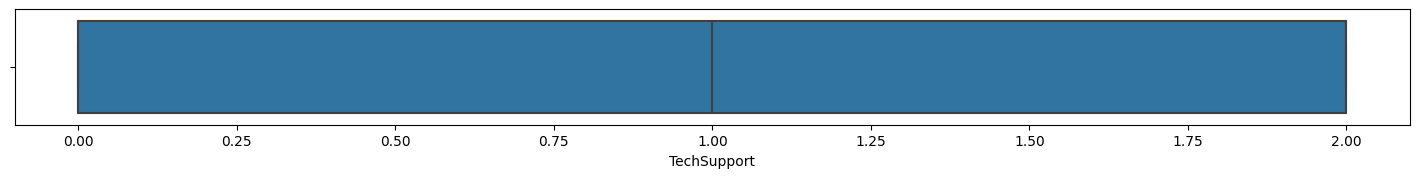

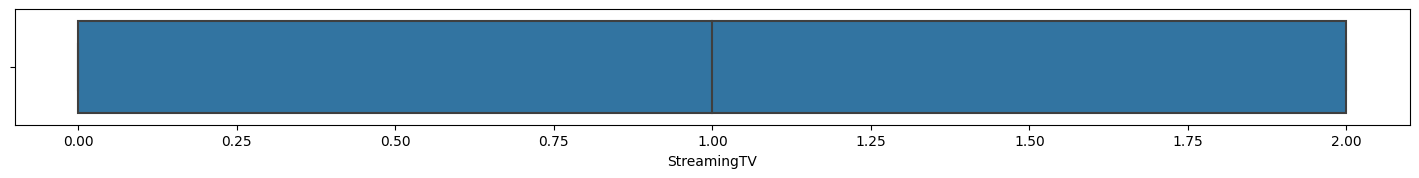

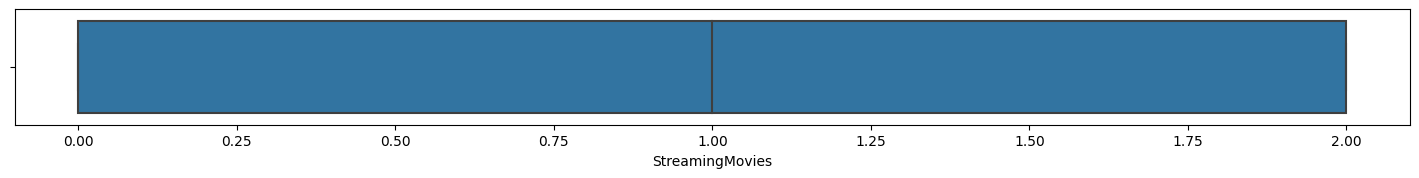

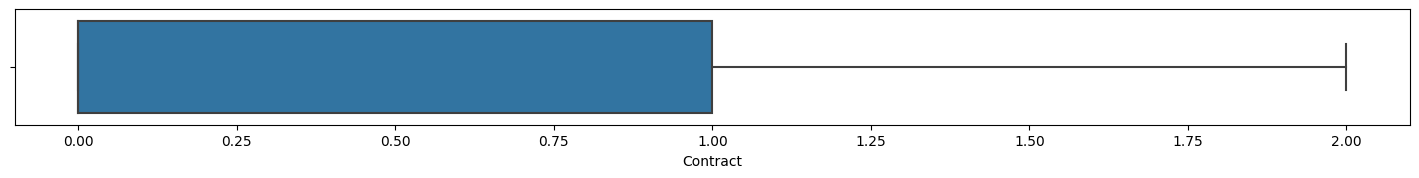

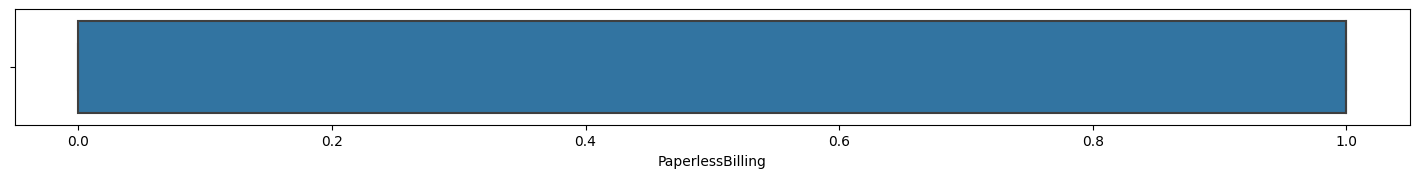

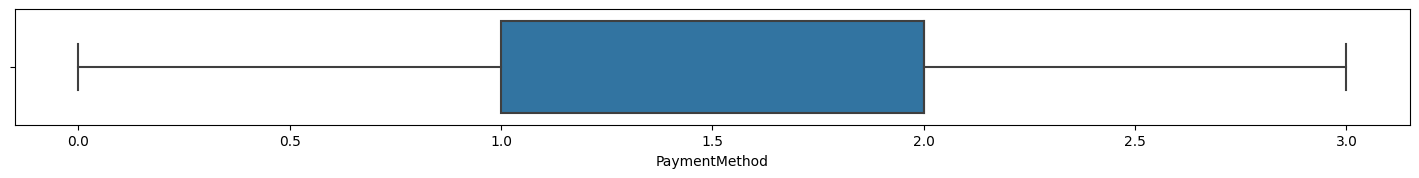

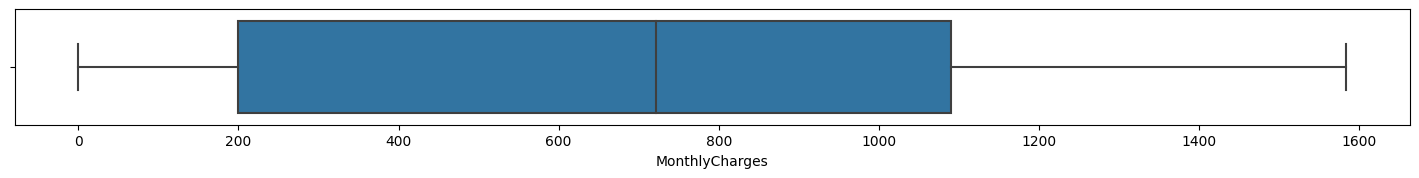

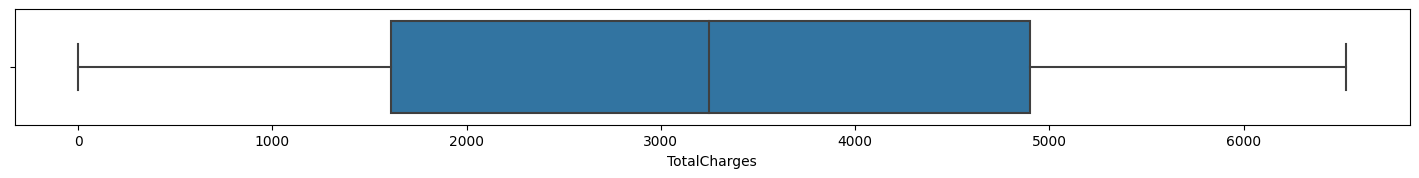

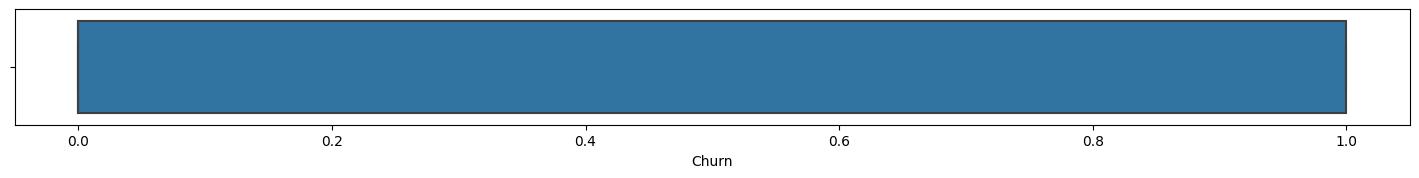

In [ ]:
# Boxplots of all the feature data
for column in df:   
        fig,ax = plt.subplots(figsize=(18,1.5))
        sns.boxplot(data=df, x=column) 

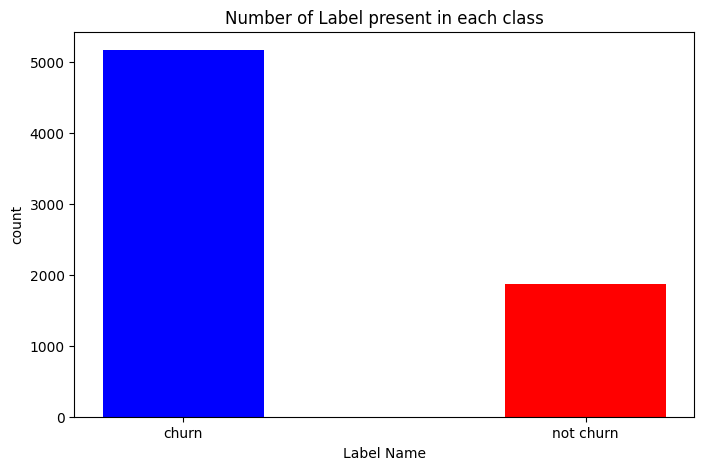

In [ ]:
# 
class_data = df["Churn"].value_counts()

# creating the dataset
data = class_data.values
  
fig = plt.figure(figsize = (8, 5))
labels = ["churn","not churn"]
# creating the bar plot
plt.bar(labels,data , color=["blue","red"],
        width = 0.4)
 
plt.xlabel("Label Name")
plt.ylabel("count")
plt.title("Number of Label present in each class")
plt.show()

Feature selection

In [ ]:
# Separating feature and output labels
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
# Data balancing using smote technique
smote = SMOTE()
feature_data,label  = smote.fit_resample(X,y)
print(feature_data.shape, label.shape)

(10348, 20) (10348,)


Feature Selection

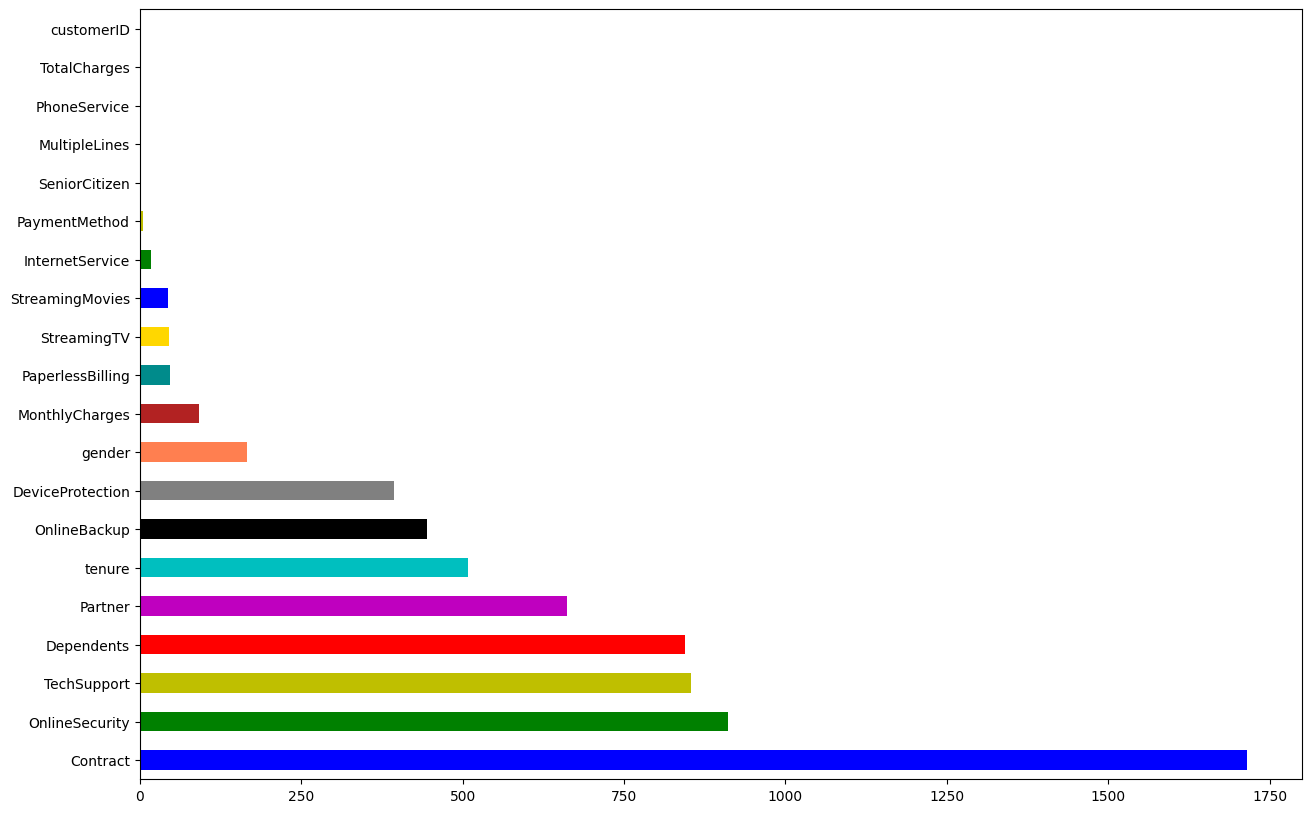

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# apply SelectKBest class to extract top 10 best features
scaler = MinMaxScaler(feature_range=(0,1))
model=scaler.fit(feature_data)
scaled_data=model.transform(feature_data)
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit =bestfeatures.fit(scaled_data,label)

feat_importances = pd.Series(fit.scores_,feature_data.columns)
feat_importances.nlargest(31).plot(kind='barh',figsize=(15,10),color=['b','g','y','r','m','c','k','gray','coral','firebrick','darkcyan','gold'])
plt.show()

In [ ]:
feature_data = feature_data[['gender', 'Partner', 'Dependents',
       'tenure', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges']]

In [ ]:
class KMedoids:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        n = X.shape[0]
        D = pairwise_distances(X)
        self.medoids = np.zeros(self.n_clusters, dtype=int)
        old_medoids = np.copy(self.medoids)
        # randomly initialize medoids
        self.medoids = np.random.choice(n, self.n_clusters, replace=False)

        for _ in range(self.max_iter):
            # assign each sample to nearest medoid
            labels = np.argmin(D[:, self.medoids], axis=1)

            # update medoids
            for i in range(self.n_clusters):
                cluster = np.where(labels == i)[0]
                medoid = np.argmin(np.mean(D[np.ix_(cluster, cluster)], axis=1))
                self.medoids[i] = cluster[medoid]

            # check for convergence
            if np.all(old_medoids == self.medoids):
                break

        # assign final labels
        self.labels_ = np.argmin(D[:, self.medoids], axis=1)

        return self


In [ ]:
# fit KMedoids to the data
km = KMedoids(n_clusters=2, max_iter=100)
km.fit(feature_data)

# print cluster labels and medoids
print(km.labels_)
print(km.medoids)
labels_data = pd.DataFrame(km.labels_)

[0 0 0 ... 0 1 0]
[9203 6618]


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(feature_data.values,labels_data.values.ravel(),random_state = 42,test_size = 0.25)

In [ ]:
y_train_label = to_categorical(y_train)
y_test_label = to_categorical(y_test)

Training using Svm

In [ ]:
svm_model = LinearSVC()
svm_model.fit(X_train,y_train)
pickle.dump(svm_model,open("/content/gdrive/MyDrive/churn_project/svm_weight.p","wb"))
svm_prediction = svm_model.predict(X_test)
print('Accuracy of  svm model: {0:.2f}'.format(accuracy_score(y_test,svm_prediction)*100))

Accuracy of  svm model: 97.22


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


classification report

In [ ]:
print(classification_report(svm_prediction,y_test,target_names=["churn","not churn"]))

              precision    recall  f1-score   support

       churn       0.99      0.94      0.97      1056
   not churn       0.96      0.99      0.98      1531

    accuracy                           0.97      2587
   macro avg       0.98      0.97      0.97      2587
weighted avg       0.97      0.97      0.97      2587



In [ ]:
# metrics calculation
svm_accuracy = accuracy_score(svm_prediction,y_test)
svm_precision = precision_score(svm_prediction,y_test)
svm_recall = recall_score(svm_prediction,y_test)
svm_f1 = f1_score(svm_prediction,y_test)

confusion matrix

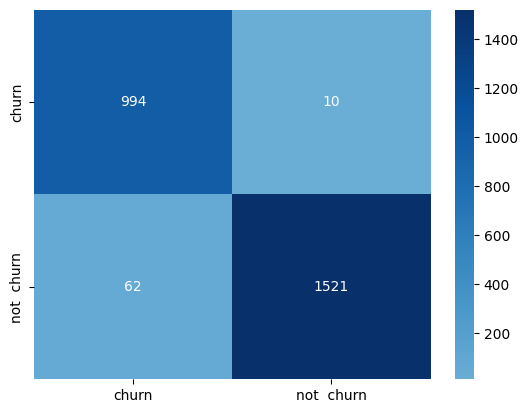

In [ ]:
labels = ['churn','not  churn']
CM = confusion_matrix(y_test, svm_prediction)
# drawing confusion matrix
sns.heatmap(CM, center = True , annot=True, fmt="d" ,cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.show()

Training using Logistric regression

In [ ]:
lr_model = LogisticRegression(max_iter = 20,fit_intercept = True)
lr_model.fit(X_train,y_train)
pickle.dump(lr_model,open("/content/gdrive/MyDrive/churn_project/lr_weight.p","wb"))
lr_prediction = lr_model.predict(X_test)
print('Accuracy of  logistic regression model: {0:.2f}'.format(accuracy_score(y_test,lr_prediction)*100))

Accuracy of  logistic regression model: 83.38


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#  metrics calculation
lr_accuracy = accuracy_score(lr_prediction,y_test)
lr_precision = precision_score(lr_prediction,y_test)
lr_recall = recall_score(lr_prediction,y_test)
lr_f1 = f1_score(lr_prediction,y_test)

classfication report

In [ ]:
print(classification_report(lr_prediction,y_test,target_names=["churn","not churn"]))

              precision    recall  f1-score   support

       churn       0.62      0.93      0.74       662
   not churn       0.97      0.80      0.88      1925

    accuracy                           0.83      2587
   macro avg       0.79      0.87      0.81      2587
weighted avg       0.88      0.83      0.84      2587



confusion matrix

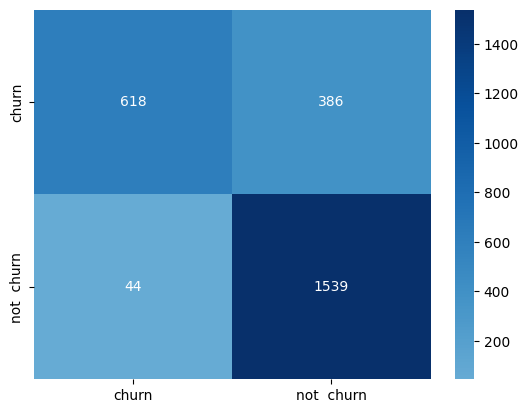

In [ ]:
labels = ['churn','not  churn']
CM = confusion_matrix(y_test, lr_prediction)
# drawing confusion matrix
sns.heatmap(CM, center = True , annot=True, fmt="d" ,cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.show()

Training using SGD Classifier algorithm

In [ ]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train,y_train)
pickle.dump(sgd_model,open("/content/gdrive/MyDrive/churn_project/sgd_weight.p","wb"))
sgd_prediction = sgd_model.predict(X_test)
print('Accuracy of  sgd model: {0:.2f}'.format(accuracy_score(y_test,sgd_prediction)*100))

Accuracy of  sgd model: 95.98


classification report

In [ ]:
print(classification_report(sgd_prediction,y_test,target_names=["churn","not churn"]))

              precision    recall  f1-score   support

       churn       0.90      1.00      0.95       900
   not churn       1.00      0.94      0.97      1687

    accuracy                           0.96      2587
   macro avg       0.95      0.97      0.96      2587
weighted avg       0.96      0.96      0.96      2587



In [ ]:
# metrics  calculation
sgd_accuracy = accuracy_score(sgd_prediction,y_test)
sgd_precision = precision_score(sgd_prediction,y_test)
sgd_recall = recall_score(sgd_prediction,y_test)
sgd_f1 = f1_score(sgd_prediction,y_test)

confusion matrix

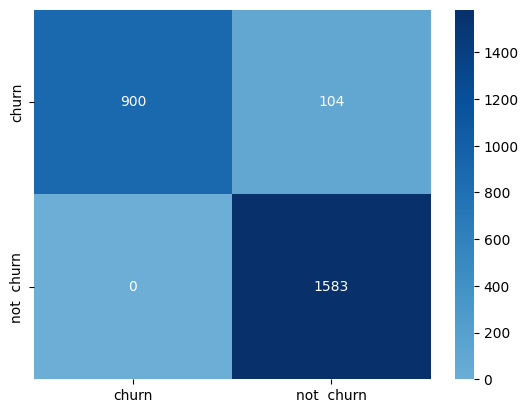

In [ ]:
labels = ['churn','not  churn']
CM = confusion_matrix(y_test, sgd_prediction)
# drawing confusion matrix
sns.heatmap(CM, center = True , annot=True, fmt="d" ,cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.show()

Training using Lstm Algorithm

In [ ]:
# Build lstm model
def lstm_algorithm():
    model_lstm = Sequential()
    model_lstm.add(LSTM(30, return_sequences=True,input_shape=(X_train.shape[1],1)))
    model_lstm.add(LSTM(units=15, return_sequences=True,activation  = "relu"))
    model_lstm.add(LSTM(units=5,activation  = "relu"))
    model_lstm.add(Dense(units=2))
    model_lstm.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001),metrics = ["accuracy"])
    return model_lstm

In [ ]:
lstm_model = lstm_algorithm()


In [ ]:
checkpointer = ModelCheckpoint('/content/gdrive/MyDrive/churn_project/lstm_weight.h5', verbose=1, save_best_only=True, monitor='val_accuracy')
lstm_history = lstm_model.fit(X_train,y_train_label, epochs = 5,validation_data=(X_test,y_test_label), batch_size = 16,callbacks = [checkpointer])

Epoch 1/5
485/486 [============================>.] - ETA: 0s - loss: 0.6755 - accuracy: 0.6317
Epoch 1: val_accuracy improved from -inf to 0.62814, saving model to /content/gdrive/MyDrive/churn_project/lstm_weight.h5
486/486 [==============================] - 27s 45ms/step - loss: 0.6756 - accuracy: 0.6316 - val_loss: 0.6587 - val_accuracy: 0.6281
Epoch 2/5
486/486 [==============================] - ETA: 0s - loss: 0.7731 - accuracy: 0.5895
Epoch 2: val_accuracy did not improve from 0.62814
486/486 [==============================] - 29s 60ms/step - loss: 0.7731 - accuracy: 0.5895 - val_loss: 0.7004 - val_accuracy: 0.3881
Epoch 3/5
484/486 [============================>.] - ETA: 0s - loss: 0.6567 - accuracy: 0.3709
Epoch 3: val_accuracy did not improve from 0.62814
486/486 [==============================] - 15s 30ms/step - loss: 0.6566 - accuracy: 0.3710 - val_loss: 0.6309 - val_accuracy: 0.3722
Epoch 4/5
486/486 [==============================] - ETA: 0s - loss: 0.5955 - accuracy: 0.30

classification report

In [ ]:
lstm_weight = load_model("/content/gdrive/MyDrive/churn_project/lstm_weight.h5")
lstm_prediction = lstm_weight.predict(X_test)
print(classification_report(lstm_prediction.argmax(axis=1),y_test_label.argmax(axis=1),target_names=["churn","not churn"]))

81/81 [==============================] - 2s 10ms/step
              precision    recall  f1-score   support

       churn       0.05      0.83      0.10        64
   not churn       0.99      0.62      0.77      2523

    accuracy                           0.63      2587
   macro avg       0.52      0.73      0.43      2587
weighted avg       0.97      0.63      0.75      2587



confusion matrix

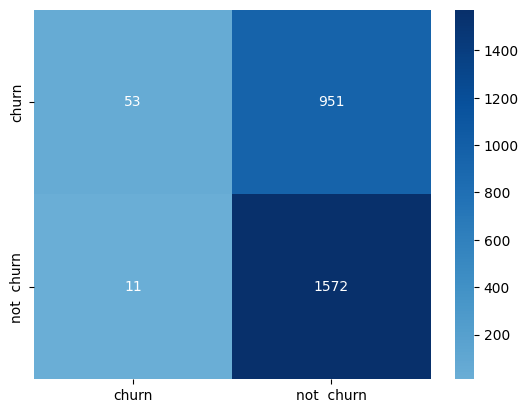

In [ ]:
labels = ['churn','not  churn']
CM = confusion_matrix(y_test_label.argmax(axis=1), lstm_prediction.argmax(axis=1))
# drawing confusion matrix
sns.heatmap(CM, center = True , annot=True, fmt="d" ,cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.show()

In [ ]:
# metrics calculation
lstm_accuracy = accuracy_score(lstm_prediction.argmax(axis=1),y_test_label.argmax(axis=1))
lstm_precision = precision_score(lstm_prediction.argmax(axis=1),y_test_label.argmax(axis=1))
lstm_recall = recall_score(lstm_prediction.argmax(axis=1),y_test_label.argmax(axis=1))
lstm_f1 = f1_score(lstm_prediction.argmax(axis=1),y_test_label.argmax(axis=1))

confusion matrix

Training using Bagging Classifier method

In [ ]:
from sklearn.ensemble import BaggingClassifier
base_estimator = SGDClassifier()

# Initialize the bagging classifier
bagging = BaggingClassifier(estimator=base_estimator, n_estimators=10, max_samples=0.5, max_features=0.5)

# Fit the bagging classifier to the training data
bagging.fit(X_train, y_train)

# Make predictions on the testing data
bagging_prediction = bagging.predict(X_test)

In [ ]:
# metrics calculation
bagging_accuracy = accuracy_score(bagging_prediction,y_test)
bagging_precision = precision_score(bagging_prediction,y_test)
bagging_recall = recall_score(bagging_prediction,y_test)
bagging_f1 = f1_score(bagging_prediction,y_test)

classification report

In [ ]:
print(classification_report(bagging_prediction,y_test,target_names=["churn","not churn"]))

              precision    recall  f1-score   support

       churn       0.78      0.95      0.86       823
   not churn       0.98      0.88      0.92      1764

    accuracy                           0.90      2587
   macro avg       0.88      0.91      0.89      2587
weighted avg       0.91      0.90      0.90      2587



confuion matrix

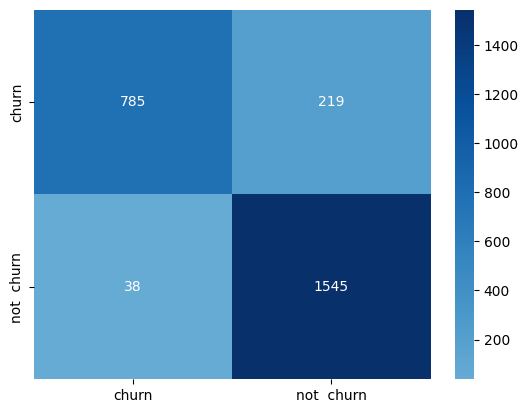

In [ ]:
labels = ['churn','not  churn']
CM = confusion_matrix(y_test, bagging_prediction)
# drawing confusion matrix
sns.heatmap(CM, center = True , annot=True, fmt="d" ,cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.show()

Training using XGBoost classifier(Boosting Classifier)

In [ ]:
# Create a base classifier
xgb_model = xgb.XGBClassifier(n_estimators =1000,max_depth = 10)


# Train the xgboost classifier on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
boosting_prediction = xgb_model.predict(X_test)



In [ ]:
# metrics cacluation
boosting_accuracy = accuracy_score(boosting_prediction,y_test)
boosting_precision = precision_score(boosting_prediction,y_test)
boosting_recall = recall_score(boosting_prediction,y_test)
boosting_f1 = f1_score(boosting_prediction,y_test)

classification report

In [ ]:
print(classification_report(boosting_prediction,y_test,target_names=["churn","not churn"]))

              precision    recall  f1-score   support

       churn       1.00      1.00      1.00      1004
   not churn       1.00      1.00      1.00      1583

    accuracy                           1.00      2587
   macro avg       1.00      1.00      1.00      2587
weighted avg       1.00      1.00      1.00      2587



confusion matrics

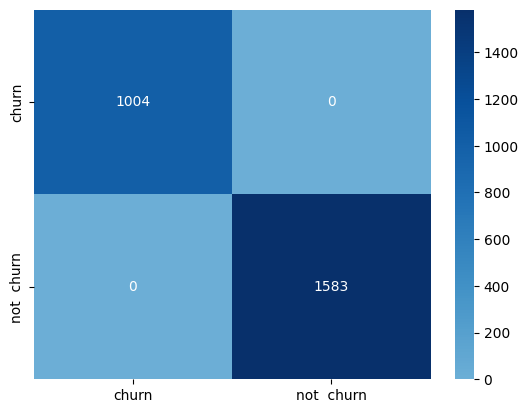

In [ ]:
labels = ['churn','not  churn']
CM = confusion_matrix(y_test, boosting_prediction)
# drawing confusion matrix
sns.heatmap(CM, center = True , annot=True, fmt="d" ,cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.show()

Training using Voting classifier technique

In [ ]:
sgd_model = SGDClassifier()
svm_model = LinearSVC()
lr_model = LogisticRegression()
lstm_model = KerasClassifier(build_fn = lstm_algorithm, nb_epoch=7, batch_size=16, verbose=False)
lstm_model._estimator_type = "classifier"
voting_model = VotingClassifier(estimators=[('sgd', sgd_model), ('svm', svm_model),('lr', lr_model),('lstm', lstm_model)],voting="hard")
voting_model.fit(X_train,y_train)
pickle.dump(voting_model,open("/content/gdrive/MyDrive/churn_project/voting_weight.p","wb"))

<ipython-input-102-211bcc15cb0c>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasClassifier(build_fn = lstm_algorithm, nb_epoch=7, batch_size=16, verbose=False)
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_r

In [ ]:
# validation
voting_prediciton = voting_model.predict(X_test)

81/81 [==============================] - 2s 7ms/step


In [ ]:
# metrics calculation
voting_accuracy = accuracy_score(voting_prediciton,y_test)
voting_precision = precision_score(voting_prediciton,y_test)
voting_recall = recall_score(voting_prediciton,y_test)
voting_f1 = f1_score(voting_prediciton,y_test)

classification report

In [ ]:
print(classification_report(voting_prediciton,y_test,target_names=["churn","not churn"]))

              precision    recall  f1-score   support

       churn       1.00      0.99      1.00      1011
   not churn       0.99      1.00      1.00      1576

    accuracy                           1.00      2587
   macro avg       1.00      1.00      1.00      2587
weighted avg       1.00      1.00      1.00      2587



confusion matrix

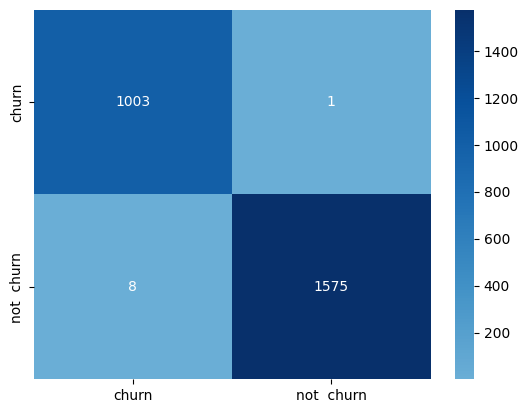

In [ ]:
labels = ['churn','not  churn']
CM = confusion_matrix(y_test, voting_prediciton)
# drawing confusion matrix
sns.heatmap(CM, center = True , annot=True, fmt="d" ,cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.show()

Training using stacking classifier

In [ ]:
sgd_model = SGDClassifier()
svm_model = LinearSVC()
lr_model = LogisticRegression()
lstm_model = KerasClassifier(build_fn = lstm_algorithm, nb_epoch=7, batch_size=16, verbose=False)
lstm_model._estimator_type = "classifier"

<ipython-input-109-7be583aef679>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasClassifier(build_fn = lstm_algorithm, nb_epoch=7, batch_size=16, verbose=False)


In [ ]:
from sklearn.ensemble import StackingClassifier
meta_model = LogisticRegression()
models = [('sgd', sgd_model), ('svm', svm_model), ('knn', lstm_model)]
# Instantiate a stacking ensemble with the base models and meta-model
stacking_model = StackingClassifier(estimators=models, final_estimator=meta_model)
# Fit the stacking ensemble to the training data
stacking_model.fit(X_train, y_train)
pickle.dump(stacking_model,open("/content/gdrive/MyDrive/churn_project/stacking_weight.p","wb"))
# Make predictions on the testing data using the stacking ensemble
stacking_prediction = stacking_model.predict(X_test)


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

81/81 [==============================] - 1s 7ms/step


In [ ]:
# metrics calculation
stacking_accuracy = accuracy_score(stacking_prediction,y_test)
stacking_precision = precision_score(stacking_prediction,y_test)
stacking_recall = recall_score(stacking_prediction,y_test)
stacking_f1 = f1_score(stacking_prediction,y_test)

Classification report

In [ ]:
print(classification_report(stacking_prediction,y_test,target_names=["churn","not churn"]))

              precision    recall  f1-score   support

       churn       0.81      1.00      0.90       818
   not churn       1.00      0.89      0.94      1769

    accuracy                           0.93      2587
   macro avg       0.91      0.95      0.92      2587
weighted avg       0.94      0.93      0.93      2587



confusion matrix

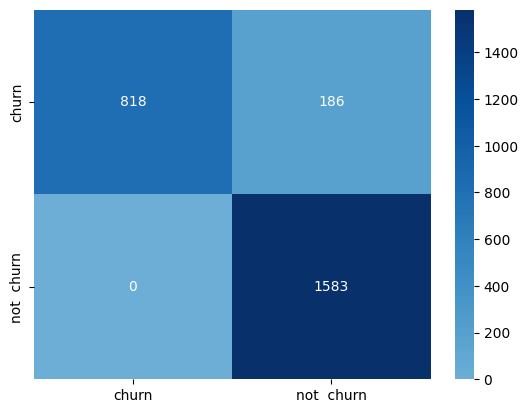

In [ ]:
labels = ['churn','not  churn']
CM = confusion_matrix(y_test, stacking_prediction)
# drawing confusion matrix
sns.heatmap(CM, center = True , annot=True, fmt="d" ,cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.show()

All algorithm metrics data

In [ ]:
svm_metrics = [svm_accuracy,svm_precision,svm_recall,svm_f1]
lr_metrics = [lr_accuracy,lr_precision,lr_recall,lr_f1]
sgd_metrics = [sgd_accuracy,sgd_precision,sgd_recall,sgd_f1]
lstm_metrics = [lstm_accuracy,lstm_precision,lstm_recall,lstm_f1]
bagging_metrics = [bagging_accuracy,bagging_precision,bagging_recall,bagging_f1]
xgb_metrics = [boosting_accuracy,boosting_precision,boosting_recall,boosting_f1]
voting_metrics = [voting_accuracy,voting_precision,voting_recall,voting_f1]
stacking_metrics = [stacking_accuracy,stacking_precision,stacking_recall,stacking_f1]

metrics = {"svm metrics":svm_metrics,"lr metrics":lr_metrics,"sgd metrics":sgd_metrics,"lstm metrics":lstm_metrics,"bagging metrics":bagging_metrics,"xgb metrics":xgb_metrics,"voting metrics":voting_metrics,"stacking metrics":stacking_metrics}
pd.DataFrame.from_dict(metrics, orient='index',columns=['accuracy',"precision","recall","f1-score"])

,accuracy,precision,recall,f1-score
svm metrics,0.972169,0.960834,0.993468,0.976879
lr metrics,0.833784,0.972205,0.799481,0.877423
sgd metrics,0.900657,0.975995,0.875850,0.923215
lstm metrics,0.628141,0.993051,0.623068,0.765709
bagging metrics,0.900657,0.975995,0.875850,0.923215
xgb metrics,1.000000,1.000000,1.000000,1.000000
voting metrics,0.996521,0.994946,0.999365,0.997151
stacking metrics,0.928102,1.000000,0.894856,0.944511


Prediction

In [ ]:
input_data = [0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 142]
input_data = np.array(input_data).reshape(1,-1)
model_weight = pickle.load(open("/content/gdrive/MyDrive/churn_project/sgd_weight.p","rb"))
prediction = model_weight.predict(input_data)
labels = ['churn','not  churn']
print("predicted label is:",labels[prediction[0]])

predicted label is: churn


In [ ]:
!pip install pyngrok
!pip install flask-ngrok
!pip install flask-cors==3.0.7
!ngrok authtoken 2GiH8URoZbuvn0eIqW4C8br8caN_73m7xUQYdwzsqxo9Jo6EX

In [ ]:

from flask_ngrok import run_with_ngrok
from flask import Flask
from flask import Flask, app,request
import json
import sys
from flask import jsonify
# import requests
from datetime import datetime
from base64 import b64decode
from flask_cors import CORS, cross_origin
import numpy as np
import pandas as pd
import pickle


app = Flask(__name__)
cors = CORS(app)
run_with_ngrok(app)   #starts ngrok when the app is run
@app.route('/churn', methods=['GET','POST'])
# @cross_origin()
def login():

    result = input(request.values.get('uri'))
    return result

def input(uri):
    print(uri)
    uri = uri.split(',')
    data = [int(i) for i in uri]
    print("[INFO] loading model...")
    input_data = np.array(data).reshape(1,-1)
    model_weight = pickle.load(open("/content/gdrive/MyDrive/churn_project/svm_weight.p","rb"))
    prediction = model_weight.predict(input_data)
    labels = ['churn','not  churn']
    print("predicted label is:",labels[prediction[0]])
    return ({"data":str(labels[prediction[0]])})

if __name__ == '__main__':
    app.run()